<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Project/TweetEval_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Constants

In [2]:
VOCAB_SIZE=2500

#Access Data from the Files

In [3]:
stream=open("train_text.txt")
tweets=stream.readlines()
stream.close()
# print(tweets)

In [4]:
len(tweets)

11916

In [5]:
for i in range(len(tweets)):
  if tweets[i].find('@user')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    tweets[i]=re.sub('@user', '', tweets[i])
# tweets    
# Words like effing converted to VetsResistSquadron

In [6]:
# tweetStrings = [ tw for tw in tweetStrings if tw!='' and tw!=' '] 

In [7]:
stream=open("train_labels.txt")
tweetsLabels=stream.readlines()
stream.close()

In [8]:
labels=[0]*len(tweetsLabels)
for i in range(len(tweetsLabels)):
  if tweetsLabels[i].find('\n')!=-1:
    # tweets[i] = tweets[i].replace('@user',"")
    labels[i]=int(re.sub('\n', '', tweetsLabels[i]))
# labels    
# Words like effing converted to VetsResistSquadron

In [9]:
len(labels)

11916

#Convert to DataFrame

In [10]:
rows=[]
rowIndices=[]
for i in range(len(tweets)):
  rows.append({"TWEET":tweets[i], "CATEGORY":labels[i]})
  rowIndices.append(i+1)
df=pd.DataFrame(rows, index=rowIndices)

In [61]:
print(df.head())
print(df.shape)
type(df.CATEGORY)

                                               TWEET  CATEGORY
1   Bono... who cares. Soon people will understan...         0
2   Eight years the republicans denied obama’s pi...         1
3   Get him some line help. He is gonna be just f...         0
4                         She is great. Hi Fiona! \n         0
5   She has become a parody unto herself? She has...         1
(11916, 2)


pandas.core.series.Series

#Check for missing values or null tweets

In [12]:
df.TWEET.isnull().values.any()

False

In [13]:
df.CATEGORY.isnull().values.any()

False

In [14]:
#Check if there are empty tweets(With string length zero).
(df.TWEET.str.len()==0).any()

False

#Offensive and non-offensive counts

In [15]:
df.CATEGORY.value_counts()

0    7976
1    3940
Name: CATEGORY, dtype: int64

In [16]:
num_offensive=df.CATEGORY.value_counts()[1]
num_nonoffensive=df.CATEGORY.value_counts()[0]

<function matplotlib.pyplot.show>

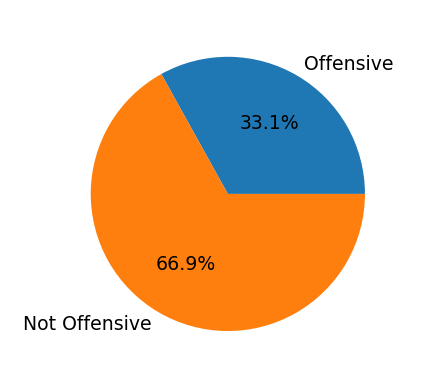

In [17]:
categoryNames=['Offensive', 'Not Offensive']
sizes=[num_offensive, num_nonoffensive]
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=categoryNames, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

#NLP

###Text pre-processing

In [18]:
st="Is the tweet Offensive or not?"
st.lower()

'is the tweet offensive or not?'

###Download NLTK Resources(Tokenizer & stopwords)

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###Tokenize

In [20]:
word_tokenize(st.lower())

['is', 'the', 'tweet', 'offensive', 'or', 'not', '?']

###Remove stop words. Word stemming

In [21]:
stop_words=set(stopwords.words('english'))

In [22]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words:
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens', '?']

###Removing punctuations

In [23]:
words=word_tokenize(st.lower())
filtered_words=[]
# stemmer=PorterStemmer()
stemmer=SnowballStemmer('english')
for word in words:
  if word not in stop_words and word.isalpha():
    stemmed_word=stemmer.stem(word)
    filtered_words.append(stemmed_word)
filtered_words

['tweet', 'offens']

###Create a function for cleaning tweets

In [24]:
def clean_tweets(tweet, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
  words=word_tokenize(tweet.lower())
  filtered_words=[]
  for word in words:
    if word not in stop_words and word.isalpha():
      stemmed_word=stemmer.stem(word)
      filtered_words.append(stemmed_word)
  return filtered_words

In [25]:
clean_tweets(st)

['tweet', 'offens']

In [26]:
len(df)
type(df.TWEET[0:5])

pandas.core.series.Series

In [27]:
# %%time
tweetsList=df.TWEET
nestedList=tweetsList.apply(clean_tweets)
nestedList[0:5]

1    [bono, care, soon, peopl, understand, gain, no...
2    [eight, year, republican, deni, obama, pick, b...
3    [get, line, help, gon, na, fine, game, went, c...
4                                   [great, hi, fiona]
5    [becom, parodi, unto, certainli, taken, heat, ...
Name: TWEET, dtype: object

In [28]:
%%time
flatList=[item for subitem in nestedList for item in subitem]
len(flatList)

CPU times: user 7.98 ms, sys: 926 µs, total: 8.9 ms
Wall time: 9.05 ms


In [29]:
tw_id_offensive=df[df.CATEGORY==1].index
tw_id_non_offensive=df[df.CATEGORY==0].index

In [30]:
tw_nested_off=nestedList.loc[tw_id_offensive]
tw_nested_non_off=nestedList.loc[tw_id_non_offensive]

In [31]:
flat_off=[item for subitem in tw_nested_off for item in subitem]
flat_non_off=[item for subitem in tw_nested_non_off for item in subitem]
off_words=pd.Series(flat_off).value_counts()
non_off_words=pd.Series(flat_non_off).value_counts()

# 5 most common words in offensive tweets
off_words[0:5]

liber      572
gun        491
like       446
control    400
peopl      341
dtype: int64

In [32]:
# 5 most common words in non-offensive tweets
non_off_words[0:5]

liber      902
gun        889
antifa     768
control    715
conserv    689
dtype: int64

In [33]:
print("Off ",off_words.shape[0]," non-off ",non_off_words.shape[0])

Off  6797  non-off  9906


In [34]:
stemmed_nested_list=df.TWEET.apply(clean_tweets)
flat_stemmed_list=[item for subitem in stemmed_nested_list for item in subitem]
unique_words=pd.Series(flat_stemmed_list).value_counts()
print("Number of unique words ",unique_words.shape[0])
unique_words.head()

Number of unique words  12337


liber      1474
gun        1380
control    1115
like       1068
antifa     1047
dtype: int64

In [35]:
frequent_words=unique_words[0:VOCAB_SIZE]
frequent_words[0:10]

liber      1474
gun        1380
control    1115
like       1068
antifa     1047
conserv     942
maga        908
peopl       840
get         803
know        657
dtype: int64

In [36]:
word_ids=list(range(0,VOCAB_SIZE))
vocab=pd.DataFrame({"VOCAB_WORD":frequent_words.index.values}, index=word_ids)
vocab.index.name="WORD_ID"
vocab.head()

,VOCAB_WORD
WORD_ID,
0,liber
1,gun
2,control
3,like
4,antifa


In [37]:
# saved file

#Generate feature and sparse matrix

###Creating a dataframe with one word per column

In [41]:
type(stemmed_nested_list)

pandas.core.series.Series

In [42]:
word_columns_df=pd.DataFrame.from_records(stemmed_nested_list.to_list())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,bono,care,soon,peopl,understand,gain,noth,follow,phoni,celebr,becom,leader,peopl,instead,help,support,fellow,countrymen,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,eight,year,republican,deni,obama,pick,breitbart,outrag,phoni,fake,presid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,get,line,help,gon,na,fine,game,went,could,see,progress,read,brought,miss,deep,ball,presenc,need,littl,time,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,great,hi,fiona,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,becom,parodi,unto,certainli,taken,heat,idiot,could,optic,know,liber,optic,substanc,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [83]:
# features:word_columns_df, labels: df.CATEGORY
word_columns_df.shape
df.CATEGORY.at[1]

0

###Create a sparse matrix for the training data

In [46]:
word_index=pd.Index(vocab.VOCAB_WORD)
type(word_index)

pandas.core.indexes.base.Index

In [51]:
word_index.get_loc('gun')

1

In [93]:
def make_sparse_matrix(df, indexed_words, labels):
  nr_rows=df.shape[0]
  nr_cols=df.shape[1]
  word_set=set(indexed_words)
  dict_list=[]

  for i in range(nr_rows):
    for j in range(nr_cols):
      word=df.iat[i,j]
      if word in word_set:
        tw_id=df.index[i]
        word_id=indexed_words.get_loc(word)
        category=labels.at[tw_id+1]
        item={'TWEET_ID': tw_id, 'LABEL':category , 'OCCURENCE':1, 'WORD_ID':word_id}

        dict_list.append(item)
  return pd.DataFrame(dict_list)

In [94]:
%%time
sparse_train_df=make_sparse_matrix(word_columns_df, word_index, df.CATEGORY)

CPU times: user 11.4 s, sys: 31.3 ms, total: 11.4 s
Wall time: 11.5 s


In [95]:
sparse_train_df[200:205]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
200,23,1,1,62
201,23,1,1,2377
202,23,1,1,561
203,23,1,1,1466
204,23,1,1,1276


In [96]:
sparse_train_df.shape

(100311, 4)

In [97]:
sparse_train_df[-5:]

,TWEET_ID,LABEL,OCCURENCE,WORD_ID
100306,11915,0,1,4
100307,11915,0,1,492
100308,11915,0,1,194
100309,11915,0,1,114
100310,11915,0,1,2175


###Combine occurences

In [100]:
train_grouped=sparse_train_df.groupby(['TWEET_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
TWEET_ID WORD_ID LABEL           
0        7       0              2
         27      0              1
         57      0              1
         71      0              1
         73      0              1

In [101]:
train_grouped=train_grouped.reset_index()
train_grouped.head()

,TWEET_ID,WORD_ID,LABEL,OCCURENCE
0,0,7,0,2
1,0,27,0,1
2,0,57,0,1
3,0,71,0,1
4,0,73,0,1


In [102]:
vocab.at[7,'VOCAB_WORD']

'peopl'

In [104]:
df.TWEET[1]

' Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen. \n'

In [105]:
train_grouped.shape

(94611, 4)